In [1]:
%pip install -qq InstructorEmbedding sentence_transformers llama_index

Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.display import display
from typing import Any, List

from InstructorEmbedding import INSTRUCTOR

from llama_index import VectorStoreIndex, SimpleWebPageReader, ServiceContext
from llama_index.chat_engine.types import ChatMode
from llama_index.embeddings.base import BaseEmbedding

from fastrepl.polish.updatable import Updatable
from fastrepl import Analyze, REPL

/Users/yujonglee/dev/fastrepl/.venv/lib/python3.11/site-packages/InstructorEmbedding/instructor.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange


In [3]:
# https://github.com/jerryjliu/llama_index/blob/c03bbd6/docs/examples/embeddings/custom_embeddings.ipynb
class InstructorEmbeddings(BaseEmbedding):
    def __init__(
        self,
        instructor_model_name: str = "hkunlp/instructor-base",
        instruction: str = str(
            Updatable(
                key="embedding_instruction",
                value="Represent a document for semantic search:",
            )
        ),
        **kwargs: Any,
    ) -> None:
        self._model = INSTRUCTOR(instructor_model_name)
        self._instruction = instruction
        super().__init__(**kwargs)

    def _get_query_embedding(self, query: str) -> List[float]:
        embeddings = self._model.encode([[self._instruction, query]])
        return embeddings[0]

    def _get_text_embedding(self, text: str) -> List[float]:
        embeddings = self._model.encode([[self._instruction, text]])
        return embeddings[0]

    def _get_text_embeddings(self, texts: List[str]) -> List[List[float]]:
        embeddings = self._model.encode([[self._instruction, text] for text in texts])
        return embeddings

load INSTRUCTOR_Transformer
max_seq_length  512
The best way to get rich is to focus on creating value. This can be done by starting your own successful business, investing wisely, or developing valuable skills that are in high demand. It's important to have a long-term perspective and be willing to take calculated risks. Additionally, being disciplined with your finances and saving and investing consistently can help you build wealth over time. Remember, getting rich is not just about making money, but also about managing and growing your wealth effectively.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


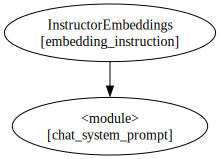

In [4]:
urls = ["http://paulgraham.com/greatwork.html"]
documents = SimpleWebPageReader(html_to_text=True).load_data(urls)

with Analyze() as controller:
    service_context = ServiceContext.from_defaults(embed_model=InstructorEmbeddings())  # type: ignore
    index = VectorStoreIndex.from_documents(
        documents=documents, service_context=service_context
    )
    chat_engine = index.as_chat_engine(
        chat_mode=ChatMode.CONTEXT,
        system_prompt=str(
            Updatable(
                key="chat_system_prompt",
                value="Act like you are YC partner.",
            )
        ),
        verbose=True,
    )
    # TODO: This only works in NB?
    # chat_engine.chat_repl()

    print(chat_engine.chat("What is the best way to get rich?"))
    display(controller.build_graph(GRAPH=2))